In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import seaborn as sns
import numpy as np
from collections import defaultdict

In [3]:
import matplotlib.pyplot as plt

sys.path.append('../experimental_sripts')

sys.path.append('/home/Container/tgnn/scripts/Models/BGNN_extended.py')

import pandas as pd
import json

from run import aggregate_results, get_name

Using backend: pytorch


In [4]:
def get_best_name(seed_results, seed, pattern=None, bgnn_style=False):
    res = seed_results[seed]
    if pattern is not None:
        res = {x: res[x] for x in filter(lambda x: pattern in x, res)}
            
    if bgnn_style:
        return min(res, key=lambda x: res[x][0][1])
    return min(res, key=lambda x: res[x][1])

In [5]:
with open('/home/Container/tgnn/scripts/experimental_sripts/results2/bgnn_extended/seed_results.json', 'r') as fp:
    bgnn_extended_seed = json.load(fp)

In [6]:
with open(f'../experimental_sripts/results2/bgnn_extended/0/{get_best_name(bgnn_extended_seed, "0", bgnn_style=True)}.txt', 'r') as fp:
    bgnn_extended_loss = fp.readline()
    bgnn_extended_loss = np.array(eval(' '.join(bgnn_extended_loss.split()[1:])))

In [7]:
with open('/home/Container/tgnn/scripts/experimental_sripts/results2/bgnn_pre_learning/seed_results.json', 'r') as fp:
    bgnn_not_pre_learned_seed = json.load(fp)

In [8]:
with open(f'../experimental_sripts/results2/bgnn_pre_learning/0/{get_best_name(bgnn_not_pre_learned_seed, "0", "only_gbdtTrue", bgnn_style=True)}.txt', 'r') as fp:
    bgnn_not_pre_learned_loss = fp.readline()
    bgnn_not_pre_learned_loss = np.array(eval(' '.join(bgnn_not_pre_learned_loss.split()[1:])))

In [9]:
with open('/home/Container/bgnn/results/house/26_02/seed_results.json', 'r') as fp:
    bgnn_seed = json.load(fp)

In [10]:
with open('/home/Container/results/house/29_04/seed_results.json', 'r') as fp:
    all_seed = json.load(fp)

In [11]:
with open('/home/Container/bgnn/results/house/29_04/seed_results.json', 'r') as fp:
    gnn_seed = json.load(fp)

In [12]:
best_name = get_best_name(all_seed, "0", bgnn_style=True, pattern='mlp')
with open(f'/home/Container/results/house/29_04/0/{best_name}.txt', 'r') as fp:
    mlp_loss = fp.readline()
    while mlp_loss.split(' ')[0]!='loss':
        mlp_loss = fp.readline()
    mlp_loss = np.array(eval(' '.join(mlp_loss.split()[1:])))

In [13]:
best_name = get_best_name(all_seed, "0", bgnn_style=True, pattern='catboost')
with open(f'/home/Container/results/house/29_04/0/{best_name}.txt', 'r') as fp:
    catboost_loss = ' '
    while catboost_loss.split(' ')[0]!='loss':
        catboost_loss = fp.readline()
    catboost_loss = np.array(eval(' '.join(catboost_loss.split()[1:])))

In [14]:
best_name = get_best_name(gnn_seed, "0", bgnn_style=True, pattern='mlpFalse')
with open(f'/home/Container/bgnn/results/house/29_04/0/{best_name}.txt', 'r') as fp:
    gnn_loss = ' '
    while gnn_loss.split(' ')[0]!='loss':
        gnn_loss = fp.readline()
    gnn_loss = np.array(eval(' '.join(gnn_loss.split()[1:])))

In [15]:
best_name = get_best_name(gnn_seed, "0", bgnn_style=True, pattern='mlpTrue')
with open(f'/home/Container/bgnn/results/house/29_04/0/{best_name}.txt', 'r') as fp:
    gnn_mlp_loss = ' '
    while gnn_mlp_loss.split(' ')[0]!='loss':
        gnn_mlp_loss = fp.readline()
    gnn_mlp_loss = np.array(eval(' '.join(gnn_mlp_loss.split()[1:])))

In [16]:
best_name = get_best_name(all_seed, "0", bgnn_style=True, pattern='lightgbm')
with open(f'/home/Container/results/house/29_04/0/{best_name}.txt', 'r') as fp:
    lightgbm_loss = fp.readline()
    lightgbm_loss = np.array(eval(' '.join(lightgbm_loss.split()[1:])))

In [17]:
with open(f'/home/Container/bgnn/results/house/26_02/0/{get_best_name(bgnn_seed, "0", bgnn_style=True)}.txt', 'r') as fp:
    bgnn_loss = fp.readline()
    bgnn_loss = np.array(eval(' '.join(bgnn_loss.split()[1:])))

In [18]:
with open('../experimental_sripts/mgbdt_results/MGBDT-loss_test.json', 'r') as fp:
    MGBDT_results = np.array(json.load(fp))

In [19]:
with open('../experimental_sripts/results2/house/MGBDT/MGBDT-loss_test.json', 'r') as fp:
    MGBDT_results_prev = np.array(json.load(fp))

In [20]:
with open('../experimental_sripts/results2/house/MGBDT/MGBDT-inductiveFalse_graph_net-dropout0.2-hidden_dim64-namegat-residualTrue-in_dim8-out_dim1_tab_net-dims[6, 8, 8]_layer_kwargs-learning_rate0.1-max_depth6-num_boost_round1-gnn_passes_per_epoch10-accum_steps1-pretrainTrue-loss_test.json', 'r') as fp:
    MGBDT_big_results = np.array(json.load(fp))

In [21]:
with open('/home/Container/tgnn/scripts/experimental_sripts/results/house/NODE/NODE-loss_test.json', 'r') as fp:
    node_results = np.array(json.load(fp))

In [22]:
sns.set()

In [23]:
with open('/home/Container/tgnn/scripts/experimental_sripts/results_DENSE/house/Dense/DENSE-loss_test.json', 'r') as fp:
    DENSE_results = np.array(json.load(fp))

In [24]:
def put_data_to_dict(loss, dicct, isgnn=False, name=None):
    data_to_draw = dicct
#     import pdb; pdb.set_trace()
    n = len(loss)
    data_to_draw['x'] += list(range(len(loss)))
    data_to_draw['y']+= list(loss[:, 2])
    data_to_draw['name'] += [name]*n
    data_to_draw['gnn'] += [isgnn]*n

In [25]:
data_to_draw=defaultdict(list)

In [26]:
put_data_to_dict(MGBDT_results, data_to_draw, isgnn=True, name='MGBDT')
put_data_to_dict(bgnn_loss, data_to_draw, isgnn=True, name='BGNN')
put_data_to_dict(lightgbm_loss, data_to_draw, isgnn=False, name='LightGBM')
put_data_to_dict(catboost_loss, data_to_draw, isgnn=False, name='Catboost')
put_data_to_dict(gnn_loss, data_to_draw, isgnn=True, name='GAT')
put_data_to_dict(DENSE_results, data_to_draw, isgnn=True, name='NODE')
put_data_to_dict(gnn_mlp_loss, data_to_draw, isgnn=True, name='FCNN')
put_data_to_dict(mlp_loss, data_to_draw, isgnn=False, name='FCNN-GNN')

In [27]:
sns.set(font_scale=1.5)

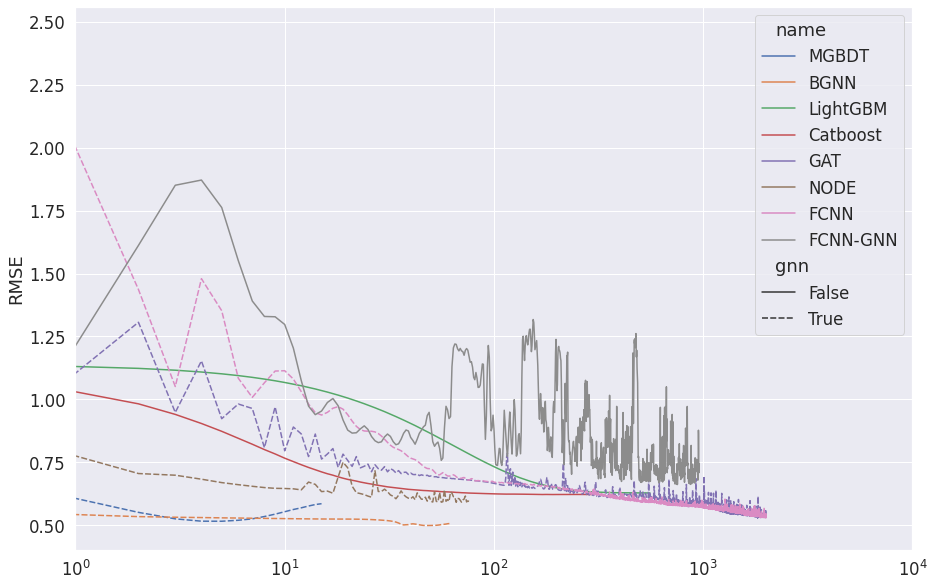

In [28]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data_to_draw, x='x', y='y', hue='name', style='gnn')
plt.xlim(1e0, 1e4)
# plt.ylim(0.4, 2.0)
plt.xscale('log')
plt.ylabel('RMSE')
plt.xlabel('')
plt.savefig('/home/Container/pics/all_losses.pdf', format='pdf', bbox_inches='tight')

/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

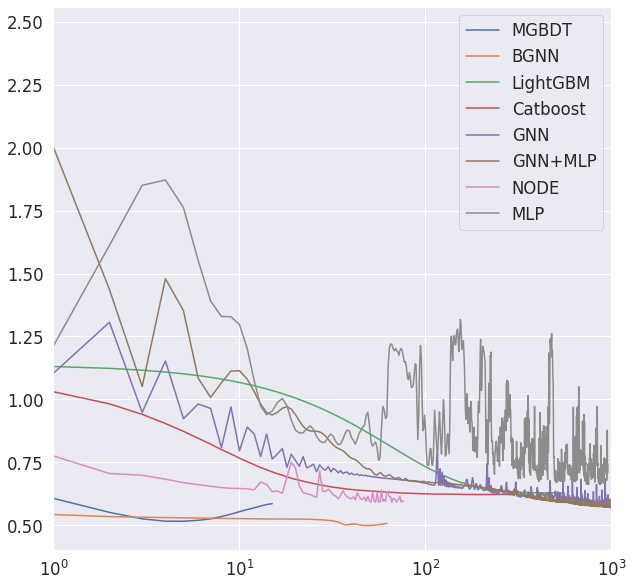

In [29]:
plt.figure(figsize=(10,10))
# x = node_results[:,1]
# y = node_results[:,2]
# g = sns.lineplot(x,y, label='NODE')

# # g.set(ylim=(0.4,0.9))
# x = np.arange(len(bgnn_extended_loss))
# y = bgnn_extended_loss[:,2]
# sns.lineplot(x,y, label='BGNN_reg')
x = np.arange(len(MGBDT_results))
y = MGBDT_results[:,2]
sns.lineplot(x,y, label='MGBDT')

# y = MGBDT_big_results[:,2]
# x = np.arange(len(MGBDT_big_results))
# sns.lineplot(x,y, label='MGBDT_big')

# y = MGBDT_results_prev[:,2]
# x = np.arange(len(MGBDT_results_prev))
# sns.lineplot(x,y, label='MGBDT_prev')

x = np.arange(len(bgnn_loss))
y = bgnn_loss[:,2]
sns.lineplot(x,y, label='BGNN')

# x = np.arange(len(bgnn_not_pre_learned_loss))
# y = bgnn_not_pre_learned_loss[:,2]
# sns.lineplot(x,y, label='BGNN_not_pre_learned')

x = np.arange(len(lightgbm_loss))
y = lightgbm_loss[:,2]
sns.lineplot(x,y, label='LightGBM')

x = np.arange(len(catboost_loss))
y = catboost_loss[:,2]
sns.lineplot(x,y, label='Catboost')

x = np.arange(len(gnn_loss))
y = gnn_loss[:,2]
sns.lineplot(x,y, label='GNN')

x = np.arange(len(gnn_mlp_loss))
y = gnn_mlp_loss[:,2]
sns.lineplot(x,y, label='GNN+MLP')

x = np.arange(len(DENSE_results))
y = DENSE_results[:,2]
sns.lineplot(x,y, label='NODE')

x = np.arange(len(mlp_loss))
y = mlp_loss[:,2]
sns.lineplot(x,y, label='MLP')

plt.xlim(1e0, 1e3)
plt.xscale('log')

In [7]:
aggregate_results('/home/Container/tgnn/scripts/experimental_sripts/results_DENSE/house/Dense/seed_results.json', task='regression')

{'NODE_gat_16': (0.5908990263938904, 0.008400557935478814)}

In [6]:
aggregate_results('/home/Container/tgnn/scripts/experimental_sripts/results_DENSE/county/Dense/seed_results.json', task='regression')

{'NODE_gat_16': (1.4893161535263062, 0.09907662694372421)}

In [48]:
with open('/home/Container/tgnn/scripts/experimental_sripts/results_DENSE/house/Dense/seed_results.json', 'r') as fp:
    seed_res = json.load(fp)

In [49]:
get_best_name(seed_res, '0', bgnn_style=False)

'NODE-inductiveFalse_graph_net-dropout0.0-hidden_dim64-namegat-residualFalse-in_dim8-out_dim1_tab_net-cat_dims16-dims[6, 128]-layer_typeDense-nclass8-cats{}_layer_kwargs-flatten_outputTrue-num_layers2-tree_dim3-passes_per_epoch1-accum_steps100'